In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Встановлення параметрів
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# Трансформації для даних
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Завантаження датасету MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Створення завантажувачів даних
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Функція для додавання шуму
def add_noise(img):
    noise = torch.randn(img.size()) * 0.2
    noisy_img = img + noise
    return noisy_img

# Визначення архітектури автокодувальника
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Енкодер
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)  # Латентний простір
        )
        # Декодер
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()  # Вихід у діапазоні [0,1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Ініціалізація моделі, функції втрат та оптимізатора
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Навчання моделі
loss_history = []

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # Перетворення зображення у вектор
        noisy_img = add_noise(img)

        # Прямий прохід
        outputs = model(noisy_img)
        loss = criterion(outputs, img)

        # Зворотний прохід та оптимізація
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    loss_history.append(loss.item())

# Візуалізація графіка функції втрат
plt.plot(loss_history)
plt.title('Графік функції втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.savefig('loss_plot.png')
plt.close()

# Візуалізація результатів
model.eval()
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        noisy_img = add_noise(img)
        outputs = model(noisy_img)
        break  # Використовуємо лише один батч для демонстрації

# Перетворення у numpy для візуалізації
img = img.numpy().reshape(-1, 28, 28)
noisy_img = noisy_img.numpy().reshape(-1, 28, 28)
outputs = outputs.numpy().reshape(-1, 28, 28)

# Відображення зображень
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i in range(5):
    axes[0, i].imshow(img[i], cmap='gray')
    axes[0, i].set_title('Оригінал')
    axes[1, i].imshow(noisy_img[i], cmap='gray')
    axes[1, i].set_title('Зашумлений')
    axes[2, i].imshow(outputs[i], cmap='gray')
    axes[2, i].set_title('Відновлений')
plt.tight_layout()
plt.savefig('results.png')
plt.close()

Epoch [1/10], Loss: 0.0453
Epoch [2/10], Loss: 0.0379
Epoch [3/10], Loss: 0.0353
Epoch [4/10], Loss: 0.0394
Epoch [5/10], Loss: 0.0395
Epoch [6/10], Loss: 0.0320
Epoch [7/10], Loss: 0.0374
Epoch [8/10], Loss: 0.0350
Epoch [9/10], Loss: 0.0310
Epoch [10/10], Loss: 0.0253


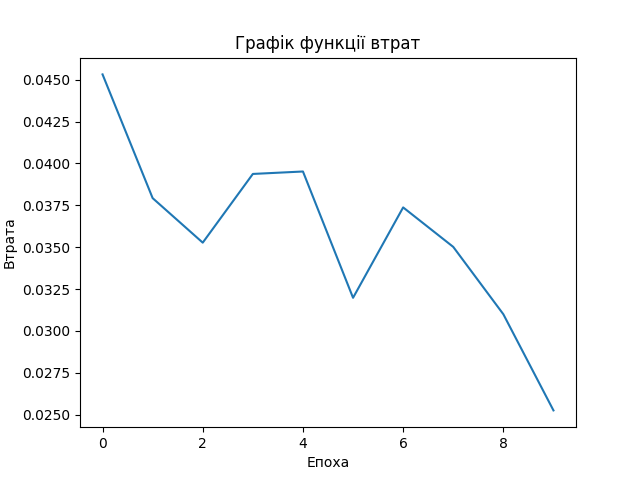

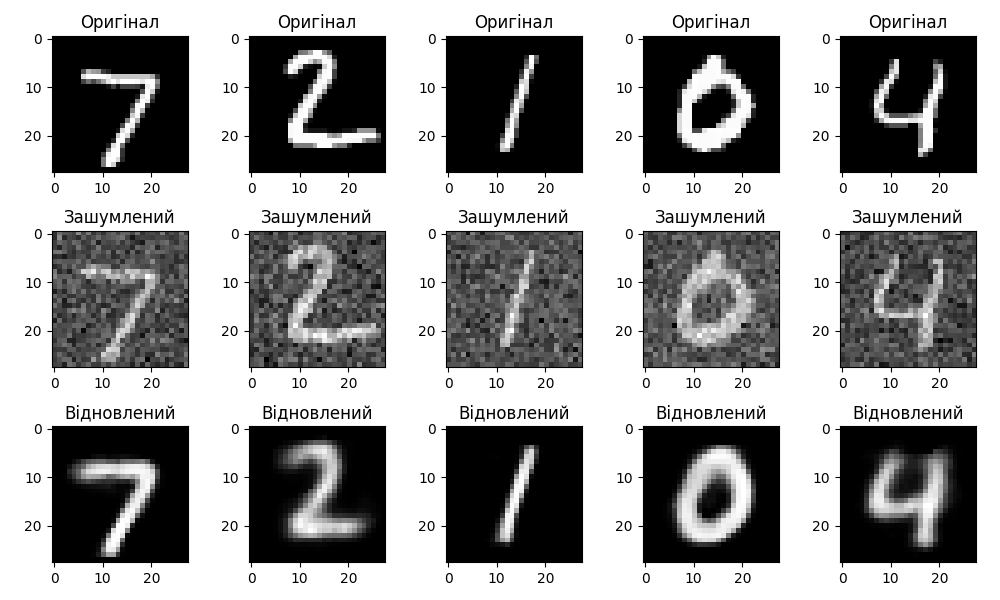

In [3]:
from IPython.display import Image
display(Image('loss_plot.png'))
display(Image('results.png'))